<p><img alt="Colaboratory logo" height="50px" src="https://github.com/INGEOTEC/text_models/raw/master/docs/source/ingeotec.png" align="left" hspace="10px" vspace="0px" /></p>

# CompStats
## Quickstart Guide

### <http://compstats.readthedocs.org>



## Installing CompStats

In [41]:
# !python -m pip uninstall CompStats

In [42]:
# %pip install -U git+https://github.com/INGEOTEC/CompStats@develop

First, we need to install CompStats. This can be quickly done through pip, the Python package manager.

In [43]:
try:
  import CompStats
except ImportError:
    !pip install Compstats
    # !pip install -U git+https://github.com/INGEOTEC/CompStats@develop

## Libraries

After installing `CompStats`, we must import the necessary libraries for our analysis. `CompStats` relies on several Python libraries for data analysis and scientific computing.

The first line of the following code loads two functions from the `CompStats` library. The `performance` function is used to calculate and analyze the performance of machine learning models. On the other hand, the `plot_performance` function visualizes the performance metrics calculated by `performance`, such as accuracy or F1 score, along with confidence intervals to help understand the variability and reliability of the performance metrics.

The second line imports two functions: `difference` and `plot_difference`; `difference` assesses the differences in performance between models in comparison to the best system, and `plot_difference` visually represents these differences relative to the best system.

The third line imports two functions: `all_differences` and `difference_p_value`. `all_differences` evaluates the differences in performance between all models, and `difference_p_value` estimates the p-value of the hypothesis that the difference is significantly greater than zero.

The fourth line imports the function `multipletests`that is used for adjusting p-values when multiple hypothesis tests are performed, to control for the false discovery rate or family-wise error rate.

The rest of the lines load commonly used Python libraries.

In [44]:
from CompStats import performance, plot_performance
from CompStats import difference, plot_difference
from CompStats import all_differences, difference_p_value
from statsmodels.stats.multitest import multipletests
from sklearn.metrics import f1_score
import pandas as pd

# Dataset

Once we have set up our environment, we can explore what CompStats offers. Let's begin with a basic example of how to use CompStats for a simple statistical analysis.

To illustrate the use of CompStats, we will use a dataset included in the CompStats package. The path of the dataset is found with the following instructions. The variable `DATA` contains the path as shown below.  

In [45]:
# from CompStats.tests.test_performance import DATA
DATA = 'MeOffendEs_subtask3.csv'

`DATA` contains the information to compare six systems for a multiclass classification task. The next instruction loads the data into a dataframe.

In [46]:
df = pd.read_csv(DATA)

The first five rows of `df` are shown below. It can be observed that the first column contains the gold standard, identified with `y`, and the rest of the columns are the predictions performed by different systems.

In [47]:
df.tail(5)

,y,aomar,CEN-Amrita,CIC-IPN,CIMAT-GTO,CIMAT-MTY-GTO,DCCD-INFOTEC,NLP-CIC,Timen,UMUTeam,xjywing
2178,0,1,1,1,1,1,0,1,1,0,1
2179,1,1,1,0,1,1,1,1,0,1,1
2180,0,1,1,0,0,0,0,0,0,0,1
2181,1,1,1,0,1,1,1,1,0,0,1
2182,0,1,1,0,1,0,0,0,0,0,1


In [48]:
df

,y,aomar,CEN-Amrita,CIC-IPN,CIMAT-GTO,CIMAT-MTY-GTO,DCCD-INFOTEC,NLP-CIC,Timen,UMUTeam,xjywing
0,0,1,1,0,0,0,0,0,0,0,1
1,0,1,1,1,0,0,1,0,0,0,1
2,1,1,1,1,0,1,1,0,1,1,1
3,0,1,1,0,0,0,0,0,0,0,1
4,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2178,0,1,1,1,1,1,0,1,1,0,1
2179,1,1,1,0,1,1,1,1,0,1,1
2180,0,1,1,0,0,0,0,0,0,0,1
2181,1,1,1,0,1,1,1,1,0,0,1


# Performance Anaylisis

Let us start with the performance analysis of the different systems. The performance metric used is the weighted average F1 score. This performance is coded in the variable `score` as observed in the next instruction.

In [49]:
score = lambda y, hy: f1_score(y, hy, average='binary')

The next step is to compute the performance on the bootstrap samples; this is done with the function `performance`. The function has a few parameters; one is the `score`, which receives the metric used to measure the performance.

In [50]:
perf = performance(df, score=score,num_samples=10000)

`perf` is an instance of `StatisticSamples`, the bootstrap samples can be seen on the property `calls`. The first five bootstrap samples of the performance of INGEOTEC are shown below. -- It verifies that the key is in the dictionary in case the dataset has been changed. --

In [51]:
if 'DCCD-INFOTEC' in perf.calls:
  print(f"{perf.calls['DCCD-INFOTEC'][:5]}")

[0.68016878 0.69073011 0.68639053 0.67521368 0.6984127 ]


The performance of the systems, along with their confidence intervals, can be seen using the next instruction.

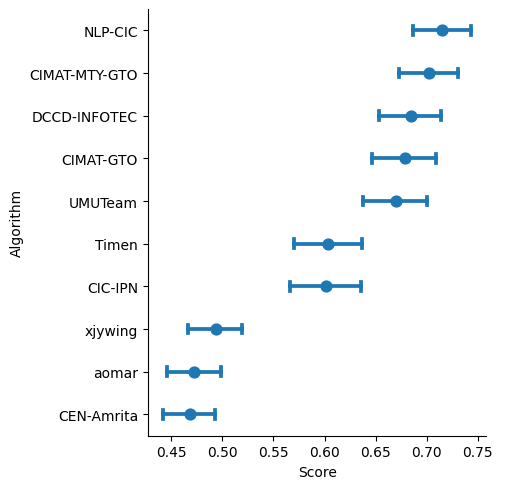

In [52]:
face_grid = plot_performance(perf)

It can be observed that the best system is INGEOTEC. Although the confidence intervals provide information that helps to assess the difference in the performance of the systems, in this case, the intervals intersect. Therefore, one needs another statistical tool to determine if the difference in performance is significant.

# Performance Comparison against the Winner

The difference in their performance compared to the best-performing system can be used to compare the algorithms analyzed. The function `difference` computes the difference as shown below.

In [53]:
diff = difference(perf)

`diff` is an instance of `StatisticSamples`; one can find the best system on the property `info`, as the following instruction shows.

In [54]:
diff.info

{'best': 'NLP-CIC'}

The difference in performance can be visualized with the following instruction.

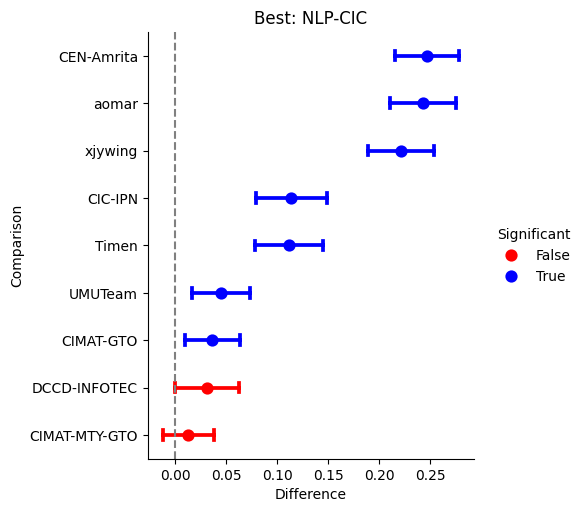

In [55]:
face_grid_diff = plot_difference(diff)

From the performance graphs, for this example, we can observe that the ranking is *INGEOTEC*, *BoW*, *StackBoW*, *BoW (Corpus)*, *Dense*, *Bow (Class Weight)*. Hence, in the last graph, we analyze the performance difference against the winner (INGEOTEC). From this graph, we can conclude that *BoW* and *StackBoW*, might perform similarly to INGEOTEC.

Should we test the hypothesis of equality versus difference, considering that one system outperforms the other in the test? To address this question, we compare the performance of two systems, $A$ and $B$, to determine whether $A$ is superior to $B$ in a larger data population, represented as $\theta_A > \theta_B$. We can estimate the p-value associated with the hypothesis test $H_0: \theta_A \le \theta_B$ vs $H_1: \theta_A > \theta_B$ given the data, equivalently $H_0: \theta_A< -  \theta_B\le 0$ vs $H_1: \theta_A - \theta_B > 0$. The p-values for these differences can be estimated using the following instruction, comparing them against the winner (INGEOTEC) to determine the probability that $a$ (INGEOTEC) is better than $b$.

The `difference_p_value` function estimates the p-value for each difference in comparison to the best system, as illustrated below.


In [56]:
p_values = difference_p_value(diff)

For a given $\alpha$ level, p-values smaller than $\alpha$  are significant, meaning the observed difference is unlikely to be due to chance. An $\alpha$ level of 0.05 is commonly used.

In [57]:
p_values

{'CEN-Amrita': np.float64(0.0),
 'aomar': np.float64(0.0),
 'xjywing': np.float64(0.0),
 'CIC-IPN': np.float64(0.0),
 'Timen': np.float64(0.0),
 'UMUTeam': np.float64(0.0018),
 'CIMAT-GTO': np.float64(0.0043),
 'DCCD-INFOTEC': np.float64(0.0298),
 'CIMAT-MTY-GTO': np.float64(0.162)}

In [58]:
result = multipletests(list(p_values.values()), method='bonferroni')
p_valuesC = dict(zip(p_values.keys(),result[1]))
p_valuesC

{'CEN-Amrita': np.float64(0.0),
 'aomar': np.float64(0.0),
 'xjywing': np.float64(0.0),
 'CIC-IPN': np.float64(0.0),
 'Timen': np.float64(0.0),
 'UMUTeam': np.float64(0.0162),
 'CIMAT-GTO': np.float64(0.0387),
 'DCCD-INFOTEC': np.float64(0.2682),
 'CIMAT-MTY-GTO': np.float64(1.0)}

# Performance comparison between all models

Similarly, the differences for each pair of variables between all models can be estimated using the function `all_differences`, as illustrated in the following instructions. This approach allows for a comprehensive analysis of how each model compares to the others, providing a statistical basis to understand the significance of performance variations among them. This method extends the comparative analysis, offering a detailed view of the competitive landscape of model performance.

In [59]:
all_diff = all_differences(perf)


In [60]:
all_diff.calls

{'NLP-CIC - CIMAT-MTY-GTO': array([0.02711943, 0.02460741, 0.00567419, ..., 0.03485328, 0.02348728,
        0.0245068 ]),
 'NLP-CIC - DCCD-INFOTEC': array([0.0553476 , 0.02913689, 0.02355195, ..., 0.05243289, 0.05844883,
        0.03556182]),
 'NLP-CIC - CIMAT-GTO': array([0.03193886, 0.03661658, 0.02568716, ..., 0.0555475 , 0.04815133,
        0.06976936]),
 'NLP-CIC - UMUTeam': array([0.04770335, 0.06203767, 0.03369565, ..., 0.06216436, 0.05100779,
        0.06270989]),
 'NLP-CIC - Timen': array([0.11819089, 0.06627223, 0.10729347, ..., 0.13737969, 0.11377759,
        0.13234425]),
 'NLP-CIC - CIC-IPN': array([0.1124749 , 0.10870668, 0.09512767, ..., 0.13824591, 0.13369815,
        0.15141663]),
 'NLP-CIC - xjywing': array([0.23666264, 0.207984  , 0.21548777, ..., 0.2424946 , 0.22437087,
        0.22470935]),
 'NLP-CIC - aomar': array([0.26712813, 0.223867  , 0.23095468, ..., 0.27046206, 0.24357077,
        0.24617867]),
 'NLP-CIC - CEN-Amrita': array([0.26354985, 0.22763684, 0.24035

In [61]:
promedios = {key: sum(value) / len(value) for key, value in all_diff.calls.items()}
promedios

{'NLP-CIC - CIMAT-MTY-GTO': np.float64(0.012697699123587335),
 'NLP-CIC - DCCD-INFOTEC': np.float64(0.030773327049707224),
 'NLP-CIC - CIMAT-GTO': np.float64(0.036285837516666274),
 'NLP-CIC - UMUTeam': np.float64(0.04497987532304316),
 'NLP-CIC - Timen': np.float64(0.11166756086498968),
 'NLP-CIC - CIC-IPN': np.float64(0.11373645174760391),
 'NLP-CIC - xjywing': np.float64(0.22187266916373918),
 'NLP-CIC - aomar': np.float64(0.24265908272742337),
 'NLP-CIC - CEN-Amrita': np.float64(0.24709647829198234),
 'CIMAT-MTY-GTO - DCCD-INFOTEC': np.float64(0.018075627926119806),
 'CIMAT-MTY-GTO - CIMAT-GTO': np.float64(0.02358813839307899),
 'CIMAT-MTY-GTO - UMUTeam': np.float64(0.032282176199455885),
 'CIMAT-MTY-GTO - Timen': np.float64(0.09896986174140221),
 'CIMAT-MTY-GTO - CIC-IPN': np.float64(0.101038752624016),
 'CIMAT-MTY-GTO - xjywing': np.float64(0.20917497004015254),
 'CIMAT-MTY-GTO - aomar': np.float64(0.2299613836038363),
 'CIMAT-MTY-GTO - CEN-Amrita': np.float64(0.23439877916839627

Once again, we use the function `difference_p_value` to estimate the p-value.

In [62]:
p_values = difference_p_value(all_diff)

And we can analyze from all pairs of systems individually which ones have significantly different performances by comparing their p-value with $\alpha$.

In [63]:
p_values

{'NLP-CIC - CIMAT-MTY-GTO': np.float64(0.162),
 'NLP-CIC - DCCD-INFOTEC': np.float64(0.0298),
 'NLP-CIC - CIMAT-GTO': np.float64(0.0043),
 'NLP-CIC - UMUTeam': np.float64(0.0018),
 'NLP-CIC - Timen': np.float64(0.0),
 'NLP-CIC - CIC-IPN': np.float64(0.0),
 'NLP-CIC - xjywing': np.float64(0.0),
 'NLP-CIC - aomar': np.float64(0.0),
 'NLP-CIC - CEN-Amrita': np.float64(0.0),
 'CIMAT-MTY-GTO - DCCD-INFOTEC': np.float64(0.1065),
 'CIMAT-MTY-GTO - CIMAT-GTO': np.float64(0.0146),
 'CIMAT-MTY-GTO - UMUTeam': np.float64(0.0058),
 'CIMAT-MTY-GTO - Timen': np.float64(0.0),
 'CIMAT-MTY-GTO - CIC-IPN': np.float64(0.0),
 'CIMAT-MTY-GTO - xjywing': np.float64(0.0),
 'CIMAT-MTY-GTO - aomar': np.float64(0.0),
 'CIMAT-MTY-GTO - CEN-Amrita': np.float64(0.0),
 'DCCD-INFOTEC - CIMAT-GTO': np.float64(0.3566),
 'DCCD-INFOTEC - UMUTeam': np.float64(0.1727),
 'DCCD-INFOTEC - Timen': np.float64(0.0),
 'DCCD-INFOTEC - CIC-IPN': np.float64(0.0),
 'DCCD-INFOTEC - xjywing': np.float64(0.0),
 'DCCD-INFOTEC - aomar': 

In [64]:
{k: round(v, 3) for k, v in p_values.items()}


{'NLP-CIC - CIMAT-MTY-GTO': np.float64(0.162),
 'NLP-CIC - DCCD-INFOTEC': np.float64(0.03),
 'NLP-CIC - CIMAT-GTO': np.float64(0.004),
 'NLP-CIC - UMUTeam': np.float64(0.002),
 'NLP-CIC - Timen': np.float64(0.0),
 'NLP-CIC - CIC-IPN': np.float64(0.0),
 'NLP-CIC - xjywing': np.float64(0.0),
 'NLP-CIC - aomar': np.float64(0.0),
 'NLP-CIC - CEN-Amrita': np.float64(0.0),
 'CIMAT-MTY-GTO - DCCD-INFOTEC': np.float64(0.106),
 'CIMAT-MTY-GTO - CIMAT-GTO': np.float64(0.015),
 'CIMAT-MTY-GTO - UMUTeam': np.float64(0.006),
 'CIMAT-MTY-GTO - Timen': np.float64(0.0),
 'CIMAT-MTY-GTO - CIC-IPN': np.float64(0.0),
 'CIMAT-MTY-GTO - xjywing': np.float64(0.0),
 'CIMAT-MTY-GTO - aomar': np.float64(0.0),
 'CIMAT-MTY-GTO - CEN-Amrita': np.float64(0.0),
 'DCCD-INFOTEC - CIMAT-GTO': np.float64(0.357),
 'DCCD-INFOTEC - UMUTeam': np.float64(0.173),
 'DCCD-INFOTEC - Timen': np.float64(0.0),
 'DCCD-INFOTEC - CIC-IPN': np.float64(0.0),
 'DCCD-INFOTEC - xjywing': np.float64(0.0),
 'DCCD-INFOTEC - aomar': np.float6

When conducting numerous comparisons or hypothesis tests on a dataset, the risk of incurring Type I errors (incorrectly dismissing a valid null hypothesis) increases. This happens because more tests performed increase the probability of randomly identifying statistically significant outcomes. Implementing adjustments for multiple comparisons is critical for several reasons: (1) To manage the risk of Type I Error, (2) To prevent erroneous conclusions, and (3) To uphold the integrity of the research.

The following code illustrates the effect of these methods for multiple comparison corrections. The function `multipletests` makes the p-value correction by selecting the parameter `method`. In this example, the Bonferroni correction method is used.

In [65]:
result = multipletests(list(p_values.values()), method='bonferroni')

`result` is an array; next, we convert it back into a dictionary.

In [66]:
p_valuesC = dict(zip(p_values.keys(),result[1]))

And we can analyze from all pairs of systems simunstally which ones have significantly different performances by comparing their p-value with $\alpha$.

In [67]:
p_valuesC

{'NLP-CIC - CIMAT-MTY-GTO': np.float64(1.0),
 'NLP-CIC - DCCD-INFOTEC': np.float64(1.0),
 'NLP-CIC - CIMAT-GTO': np.float64(0.1935),
 'NLP-CIC - UMUTeam': np.float64(0.081),
 'NLP-CIC - Timen': np.float64(0.0),
 'NLP-CIC - CIC-IPN': np.float64(0.0),
 'NLP-CIC - xjywing': np.float64(0.0),
 'NLP-CIC - aomar': np.float64(0.0),
 'NLP-CIC - CEN-Amrita': np.float64(0.0),
 'CIMAT-MTY-GTO - DCCD-INFOTEC': np.float64(1.0),
 'CIMAT-MTY-GTO - CIMAT-GTO': np.float64(0.657),
 'CIMAT-MTY-GTO - UMUTeam': np.float64(0.261),
 'CIMAT-MTY-GTO - Timen': np.float64(0.0),
 'CIMAT-MTY-GTO - CIC-IPN': np.float64(0.0),
 'CIMAT-MTY-GTO - xjywing': np.float64(0.0),
 'CIMAT-MTY-GTO - aomar': np.float64(0.0),
 'CIMAT-MTY-GTO - CEN-Amrita': np.float64(0.0),
 'DCCD-INFOTEC - CIMAT-GTO': np.float64(1.0),
 'DCCD-INFOTEC - UMUTeam': np.float64(1.0),
 'DCCD-INFOTEC - Timen': np.float64(0.0),
 'DCCD-INFOTEC - CIC-IPN': np.float64(0.0),
 'DCCD-INFOTEC - xjywing': np.float64(0.0),
 'DCCD-INFOTEC - aomar': np.float64(0.0),


In [86]:

# assume p_values is a dictionary with p-values as values
p_values_list = list(p_values.values())

# define the correction methods to apply
methods = ['bonferroni', 'holm', 'fdr_bh']

# create a dictionary to store the corrected p-values
corrected_pvalues = {}

# apply each correction method and store the results
for method in methods:
    result = multipletests(p_values_list, method=method)
    p_valuesC = dict(zip(p_values.keys(),result[1]))
    corrected_pvalues[method] = p_valuesC

# create a Pandas DataFrame from the corrected p-values
df = pd.DataFrame(corrected_pvalues)

# set the index to the original p-values (optional)
df.index = p_values_list

print(df)

        bonferroni    holm    fdr_bh
0.1620      1.0000  0.9720  0.182250
0.0298      1.0000  0.2384  0.035289
0.0043      0.1935  0.0473  0.005529
0.0018      0.0810  0.0216  0.002382
0.0000      0.0000  0.0000  0.000000
0.0000      0.0000  0.0000  0.000000
0.0000      0.0000  0.0000  0.000000
0.0000      0.0000  0.0000  0.000000
0.0000      0.0000  0.0000  0.000000
0.1065      1.0000  0.7455  0.122885
0.0146      0.6570  0.1314  0.017757
0.0058      0.2610  0.0580  0.007250
0.0000      0.0000  0.0000  0.000000
0.0000      0.0000  0.0000  0.000000
0.0000      0.0000  0.0000  0.000000
0.0000      0.0000  0.0000  0.000000
0.0000      0.0000  0.0000  0.000000
0.3566      1.0000  0.9720  0.364705
0.1727      1.0000  0.9720  0.189549
0.0000      0.0000  0.0000  0.000000
0.0000      0.0000  0.0000  0.000000
0.0000      0.0000  0.0000  0.000000
0.0000      0.0000  0.0000  0.000000
0.0000      0.0000  0.0000  0.000000
0.2380      1.0000  0.9720  0.249070
0.0000      0.0000  0.0000  0.000000
0

In [87]:
# Add a new column to the DataFrame with the promedios dictionary values
df['diferencias'] = list(promedios.values())
df['who'] = list(promedios.keys())

In [88]:
# Reset the index to a new column
df.reset_index(inplace=True)

# Rename the new index column to something meaningful (e.g., 'original_index')
df = df.rename(columns={'index': 'p-value'})


In [89]:
df.to_csv("comparacion.csv")